# Import lib

In [1]:
import requests
import pandas as pd
import folium
import time
import random
import matplotlib.pyplot as plt
import datetime

In [2]:
#1 choisir une ville par numero de departement
#2 afficher la population de la ville comme un fun fact (avec une ampoule à coté)
#3 récupérer la liste des piezomètres avec l'opération 'station'
#4 afficher la position des n piézomètre
#5 Selectionner un piezomètre
#6 afficher les courbe de la chronique avec l'opération 'chronique'

# Recuperer le code Inses

In [3]:
def recup_commune(departement):
    #addresse api
    curl = f'https://geo.api.gouv.fr/communes?codePostal={str(departement)}'
    #requete api
    commune_req = requests.get(curl).json()
    
    #json
    commune = commune_req[0]
    
    #info
    insee = commune['code']
    ville = commune['nom']
    population = commune['population']
    
    return insee, ville, population

In [4]:
insee, ville, population = recup_commune(67000)

print("{} possède une population de {:,.0f} habitants".format(ville, population))

Strasbourg possède une population de 287,228 habitants


# Recuperer la liste des stations

In [5]:
def recup_list_stations(insee, ville):
    #code de la ville
    insee_str = str(insee)
    #url pour la requete
    station_url = f'https://hubeau.eaufrance.fr/api/v1/niveaux_nappes/stations?code_commune={insee_str}&format=json&size=20&pretty'
    station_req = requests.get(station_url).json()
    #list des stations piezometriques
    stations = station_req['data']

    print(f"il y a {len(stations)} station(s) à {ville}")
    
    return station_req, stations

In [6]:
station_req, stations = recup_list_stations(insee, ville)

il y a 20 station(s) à Strasbourg


# Choisir une stations

In [58]:
def print_station_date(station):
    #information pour être print
    n_mesures = station['nb_mesures_piezo']
    date_debut = station['date_debut_mesure']
    date_fin = station['date_fin_mesure']
    
    #recupère date sous format Timestamp
    date_debut = pd.to_datetime(date_debut)
    date_fin = pd.to_datetime(date_fin)
    
    #calcul deltat 
    delta_t = date_fin - date_debut
    delta_t_an = delta_t.days / 365
    delta_t_mois = delta_t.days / 30
    
    #mise en forme
    delta_t_str = "{:.2f}".format(delta_t_an)
    moy = n_mesures/(delta_t_mois) #permet d'avoir une idée de la résolution temporelle du graphique
    moy_str = "{:.2f} mesures/mois".format(moy)
    
    #mise en forme des dates debut et fin
    date_debut_str = date_debut.strftime("%Y-%m-%d")
    date_fin_str = date_fin.strftime("%Y-%m-%d")
    
    print(f"il y a {n_mesures} mesures | {date_debut_str} -> {date_fin_str} ({delta_t_str} ans) | moyenne = {moy_str}")



def random_station(stations):
    n_stations = len(stations) - 1
    idx = random.randint(0,n_stations)

    station = stations[idx]
    
    print_station_date(station)
    
    return station

station = random_station(stations)

il y a 210 mesures | 1969-09-18 -> 1985-12-16 (16.25 ans) | moyenne = 1.06 mesures/mois


In [13]:
df_stations = pd.DataFrame(stations)

In [14]:
df_stations

,code_bss,urn_bss,date_debut_mesure,date_fin_mesure,code_commune_insee,nom_commune,x,y,codes_bdlisa,urns_bdlisa,...,altitude_station,nb_mesures_piezo,code_departement,nom_departement,libelle_pe,profondeur_investigation,codes_masse_eau_edl,noms_masse_eau_edl,urns_masse_eau_edl,date_maj
0,02723X0255/SOC10,http://services.ades.eaufrance.fr/pointeau/027...,1969-05-10,1985-12-16,67482,Strasbourg,7.783675,48.594645,[221AA19],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,136.8,250,67,Bas-Rhin,None,NaN,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Wed Apr 22 20:39:08 CEST 2020
1,02723X0110/S20,http://services.ades.eaufrance.fr/pointeau/027...,1971-01-12,1971-08-31,67482,Strasbourg,7.779212,48.528374,[221AA17],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,140.4,30,67,Bas-Rhin,None,9.8,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Wed Apr 22 20:39:08 CEST 2020
2,02723X0361/SOC30,http://services.ades.eaufrance.fr/pointeau/027...,1969-10-21,1997-01-29,67482,Strasbourg,7.784080,48.541528,[221AA19],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,140.7,196,67,Bas-Rhin,None,NaN,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Thu Apr 23 07:32:19 CEST 2020
3,02723X0293/S40,http://services.ades.eaufrance.fr/pointeau/027...,1971-01-12,1972-07-25,67482,Strasbourg,7.798671,48.530051,[221AA19],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,140.4,68,67,Bas-Rhin,None,10.0,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Thu Apr 23 07:32:19 CEST 2020
4,02727X0037/S50,http://services.ades.eaufrance.fr/pointeau/027...,1971-01-12,1972-07-25,67482,Strasbourg,7.789253,48.509678,[221AA19],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,141.9,69,67,Bas-Rhin,None,7.1,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Wed Apr 22 20:39:08 CEST 2020
5,02347X0001/501,http://services.ades.eaufrance.fr/pointeau/023...,1967-07-19,1998-01-28,67482,Strasbourg,7.804221,48.632254,[221AA19],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,134.65,107,67,Bas-Rhin,Puits de MAISON FORESTIERE DE FUCHS AM BUCKEL,4.8,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Wed Apr 22 08:04:52 CEST 2020
6,02723X0189/SOC11,http://services.ades.eaufrance.fr/pointeau/027...,1969-05-08,1985-12-16,67482,Strasbourg,7.760567,48.565818,[221AA17],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,138.7,247,67,Bas-Rhin,None,5.4,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Wed Apr 22 20:39:08 CEST 2020
7,02723X0279/SOC21,http://services.ades.eaufrance.fr/pointeau/027...,1969-09-18,1985-12-16,67482,Strasbourg,7.741601,48.587244,[221AA19],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,138.7,210,67,Bas-Rhin,None,8.0,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Thu Apr 23 07:32:19 CEST 2020
8,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1971-01-12,1972-07-25,67482,Strasbourg,7.787881,48.526965,[221AA19],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,140.6,69,67,Bas-Rhin,None,12.0,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Wed Apr 22 20:39:08 CEST 2020
9,02723X0294/S41,http://services.ades.eaufrance.fr/pointeau/027...,1971-01-26,1972-07-25,67482,Strasbourg,7.792740,48.519248,[221AA19],[http://reseau.eaufrance.fr/geotraitements/bdl...,...,139.7,65,67,Bas-Rhin,None,10.0,[CG101],"[Nappe d’Alsace, Pliocène de Haguenau et Oligo...",[http://www.sandre.eaufrance.fr/geo/MasseDEauS...,Thu Apr 23 07:32:19 CEST 2020


# Recup la chronique de la station

In [59]:
def recup_chronique(station, size=1000):
    code_bss = str(station['code_bss'])
    
    chronique_url = f'https://hubeau.eaufrance.fr/api/v1/niveaux_nappes/chroniques?code_bss={code_bss}&size={str(size)}'

    chronique_req = requests.get(chronique_url).json()
    chroniques = chronique_req['data']
    print(f"il y a {len(chroniques)} mesure(s)")
    
    return chronique_req, chroniques

chronique_req, chroniques = recup_chronique(station)

il y a 210 mesure(s)


In [62]:
chronique_req.keys()

dict_keys(['count', 'first', 'last', 'prev', 'next', 'api_version', 'data'])

In [63]:
chroniques[0]

{'code_bss': '02723X0279/SOC21',
 'urn_bss': 'http://services.ades.eaufrance.fr/pointeau/02723X0279/SOC21',
 'date_mesure': '1969-09-18',
 'timestamp_mesure': -9072000000,
 'niveau_nappe_eau': 135.51,
 'mode_obtention': "Mode d'obtention inconnu",
 'statut': 'Donnée brute',
 'qualification': 'Non qualifié',
 'code_continuite': '2',
 'nom_continuite': 'Point lié au point précédent',
 'code_producteur': '299',
 'nom_producteur': 'Service Géologique Régional Alsace (299)',
 'code_nature_mesure': None,
 'nom_nature_mesure': None,
 'profondeur_nappe': 3.4}

In [17]:
df_chronique = pd.DataFrame(chroniques)
df_chronique

,code_bss,urn_bss,date_mesure,timestamp_mesure,niveau_nappe_eau,mode_obtention,statut,qualification,code_continuite,nom_continuite,code_producteur,nom_producteur,code_nature_mesure,nom_nature_mesure,profondeur_nappe
0,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1971-01-12,32486400000,136.23,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,6.28
1,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1971-01-19,33091200000,136.02,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,6.49
2,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1971-01-26,33696000000,136.62,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,5.89
3,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1971-02-02,34300800000,136.34,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,6.17
4,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1971-02-09,34905600000,136.24,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,6.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1972-06-27,78451200000,136.26,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,6.25
65,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1972-07-04,79056000000,136.41,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,6.10
66,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1972-07-11,79660800000,136.35,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,6.16
67,02723X0121/S21,http://services.ades.eaufrance.fr/pointeau/027...,1972-07-18,80265600000,136.37,Mode d'obtention inconnu,Donnée brute,Non qualifié,2,Point lié au point précédent,299,Service Géologique Régional Alsace (299),None,None,6.14


In [18]:
df_chronique.to_csv('data.csv', index=False)
df = pd.read_csv('data.csv', index_col='date_mesure', parse_dates=True)

In [19]:
df_chronique['date_mesure'] = pd.to_datetime(df_chronique['date_mesure'])

<AxesSubplot:xlabel='date_mesure'>

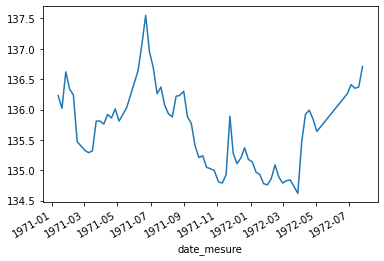

In [20]:
df['niveau_nappe_eau'].plot()

<AxesSubplot:xlabel='date_mesure'>

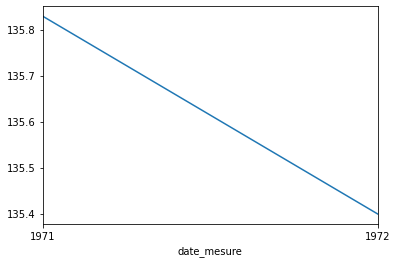

In [21]:
df['niveau_nappe_eau'].resample('Y').mean().plot()

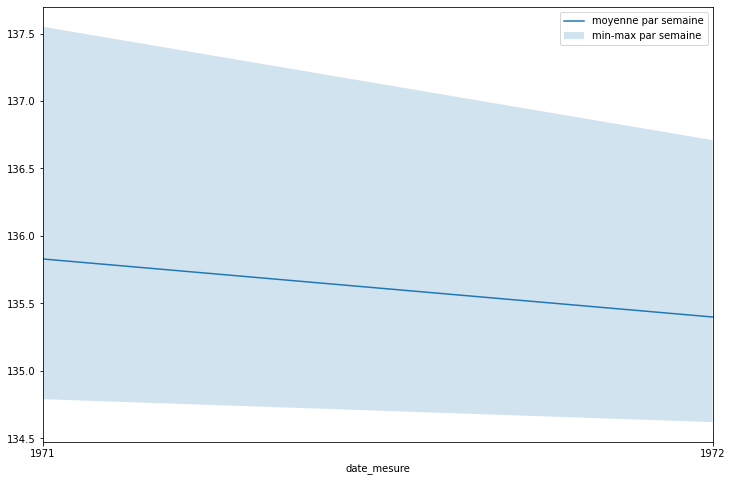

In [22]:
#m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
m = df['niveau_nappe_eau'].resample('Y').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()